# PUMP IT UP:DATA MINING THE WATER                          TABLE

## TEAM ID :  5C13

## SEM        :  V

## DIV          :  C

## TOPIC ID: 5ADMACP05


## Problem Statement:
### To predict the operating condition of a water point for each record in the given dataset.

### Team leader: Pradeep Badiger


### Team Members:
 ### Pooja Vibhutimath            161                  01FE16BCS141
 ### Pradeep Badiger               164                  01FE16BCS144
 ### Prajna Yaji                         165                   01FE16BCS145
 ### Prashant Jalisatgi             168                  01FE16BCS148

In [ ]:
## Pump it Up: Data Mining the Water Table - Data Cleaning ##

## Data Cleaning ##

### 1.Combining the labels with train data

### 2.Convert status group label into numerical data

### 3.Fixing null values before begining the analysis
#### 3.1.Funder:Lets divide funder column into 9 categories, top 9 will be remained as it is and after that they will be categorised into                               other
####                    Creating a function to categorize:
####                     Keep high frequency values and replace low frequency values with new category "other"

#### 3.2.Installer:Categorizing installer variable
####                       Lets divide installer column into 5 categories, top 5 will be remained as it is and after that they will be categorised                                    into "other"

### 4.Check the null values for training dataset
#### 4.1.The null values are replaced by mean values
#### 4.2.As there are so many unique values, high frequency values will not be able to dominate other variables. 
####        Hence, it is advisable to remove the "sub_village" column from dataset.
#### 4.3.Public_meeting:The total values are 59400. Hence, there are missing values. Filling those values with 'Unknown'
####                                  Number of missing values ~ 2000. Replacing them by mode value.
#### 4.4.Scheme_management:This attribute includes high frequency and few low as well.
####                                               Hence,the top 5 are considered and remaining values are classified as "other"
#### 4.5.Scheme:Lots of factors and the top 5 or so only represent a fraction of the total values and there are different scheme types ####                      hence, this attribute is dropped.
#### 4.6.Permit:This attribute has two values "true" and "false" and the missing values are replaced as "unknown"

### From this we can say that data is clean.

### 5.Removing duplicate attributes:
#### 5.1       waterpoint_type, extraction_type, extraction_type_group,source,quantity,quality_group,payment,management
#### 5.2.Removing the geographical attributes:region_code','district_code','num_private','wpt_name','lga','region','ward','status_group'
####      'gps_height', 'region_code', 'district_code'
#### 5.3. Turn construction_year into a categorical column containing the following values: '60s', '70s', '80s', '90s, '00s', '10s',                                   'unknown'.
#### 5.4.Convert date_recorded attribute to day since recorderd

### One hot encoding
#### Convert categorial data to binary 





# 1 Data reading

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [125]:
print("Reading data...")

train_values = pd.read_csv("Train_values.csv")
train_labels=pd.read_csv("Train_labels.csv")

test=pd.read_csv('Test_values.csv')
test_copy=test.copy()

print("Reading data...completed")

Reading data...
Reading data...completed


### combining labels with train data

In [126]:
# Combining the labels with train data
train=train_values.merge(train_labels,on='id',how='inner')

In [127]:
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


### converting status group label into neumerical data

In [128]:
#convert status group label into numerical data


val_status_group={'functional':2, 'functional needs repair':1,
                   'non functional':0}
train['status_group_vals']=train.status_group.replace(val_status_group)

train['status_group_vals'].head

<bound method NDFrame.head of 0        2
1        2
2        2
3        0
4        2
5        2
6        0
7        0
8        0
9        2
10       2
11       2
12       2
13       2
14       2
15       2
16       0
17       0
18       1
19       2
20       2
21       2
22       1
23       2
24       2
25       1
26       2
27       2
28       0
29       2
        ..
59370    2
59371    0
59372    0
59373    2
59374    2
59375    2
59376    0
59377    0
59378    2
59379    2
59380    0
59381    0
59382    0
59383    2
59384    0
59385    2
59386    2
59387    2
59388    2
59389    2
59390    2
59391    0
59392    0
59393    2
59394    0
59395    2
59396    2
59397    2
59398    2
59399    2
Name: status_group_vals, Length: 59400, dtype: int64>

# 2 Data cleaning

In [129]:
# We can see few columns contain null values. Hence, we need to fix them before beginning any sort of Analysis on the data.

# Starting with value "funder"
train['funder'].value_counts()

Government Of Tanzania            9084
Danida                            3114
Hesawa                            2202
Rwssp                             1374
World Bank                        1349
Kkkt                              1287
World Vision                      1246
Unicef                            1057
Tasaf                              877
District Council                   843
Dhv                                829
Private Individual                 826
Dwsp                               811
0                                  777
Norad                              765
Germany Republi                    610
Tcrs                               602
Ministry Of Water                  590
Water                              583
Dwe                                484
Netherlands                        470
Hifab                              450
Adb                                448
Lga                                442
Amref                              425
Fini Water               

In [130]:
#Lets divide funder column into 9 categories, top 9 will be remained as it is and after that they will be categorised into other
# Creating a function to categorize:
# Keep high frequency values and replace low frequency values with new category "other"

def funder_cleaning(train):
    if train['funder']=='Government Of Tanzania':
        return 'government'
    elif train['funder']=='Danida':
        return 'danida'
    elif train['funder']=='Hesawa':
        return 'hesawa'
    elif train['funder']=='Rwssp':
        return 'rwssp'
    elif train['funder']=='World Bank':
        return 'world_bank'
    elif train['funder']=='Kkkt':
        return 'Kkkt'
    elif train['funder']=='World Vision':
        return 'world_vision'
    elif train['funder']=='Tasaf':
        return 'Tasaf'
    elif train['funder']=='Unicef':
        return 'unicef'
    else:
        return 'other'
    
train['funder']= train.apply(lambda row: funder_cleaning(row), axis=1)
test['funder']= test.apply(lambda row: funder_cleaning(row), axis=1)

In [131]:

# Exploring "installer" variable
train['installer'].value_counts()

DWE                         17402
Government                   1825
RWE                          1206
Commu                        1060
DANIDA                       1050
KKKT                          898
Hesawa                        840
0                             777
TCRS                          707
Central government            622
CES                           610
Community                     553
DANID                         552
District Council              551
HESAWA                        539
LGA                           408
World vision                  408
WEDECO                        397
TASAF                         396
District council              392
Gover                         383
AMREF                         329
TWESA                         316
WU                            301
Dmdd                          287
ACRA                          278
World Vision                  270
SEMA                          249
DW                            246
OXFAM         

In [132]:
# Categorizing installer variable 
#Lets divide installer column into 5 categories, top 5 will be remained as it is and after that they will be categorised into other

def installer_cleaning(train):
    if train['installer']=='DWE':
        return 'dwe'
    elif train['installer']=='Government':
        return 'government'
    elif train['installer']=='RWE':
        return 'rwe'
    elif train['installer']=='Commu':
        return 'commu'
    elif train['installer']=='DANIDA':
        return 'danida'    
    else:
        return 'other'
    
train['installer']= train.apply(lambda row: installer_cleaning(row), axis=1)
test['installer']= test.apply(lambda row: installer_cleaning(row), axis=1)

In [ ]:
#Scheme Management
train['scheme_management'].value_counts()

In [ ]:
# Create a function to reduce the amount of dummy columns needed whilst maintaining the 
# information contained in the column.

# Since ther 'scheme_management' variable includes high frequency and few low as well. We'll categorize it.

def scheme_wrangler(row):
    '''Keep top 5 values and set the rest to 'other'. '''
    if row['scheme_management']=='VWC':
        return 'vwc'
    elif row['scheme_management']=='WUG':
        return 'wug'
    elif row['scheme_management']=='Water authority':
        return 'wtr_auth'
    elif row['scheme_management']=='WUA':
        return 'wua'
    elif row['scheme_management']=='Water Board':
        return 'wtr_brd'
    else:
        return 'other'

train['scheme_management'] = train.apply(lambda row: scheme_wrangler(row), axis=1)
test['scheme_management'] = test.apply(lambda row: scheme_wrangler(row), axis=1)

In [135]:
# checking null values in amount_tsh
# as functional and non functional are almost same for 0.00 value we cannot conclude anything with the value zero so replace it with mean
piv_table  = pd.pivot_table(train,index=['amount_tsh','status_group'],
                           values='status_group_vals', aggfunc='count')
piv_table

status_group_vals
amount_tsh status_group                              
0.00       functional                           19706
           functional needs repair               3048
           non functional                       18885
0.20       non functional                           3
0.25       functional                               1
1.00       non functional                           3
2.00       functional                              13
5.00       functional                             330
           non functional                          46
6.00       functional                             174
           functional needs repair                  3
           non functional                          13
7.00       functional                              54
           non functional                          15
9.00       non functional                           1
10.00      functional                             623
           functional needs repair                 16
           non functional                         167
12.00      functional                               1
15.00      functional                              14
           non functional                           1
20.00      functional                             970
           functional needs repair                 76
           non functional                         417
25.00      functional                             280
           functional needs repair                 18
           non functional                          58
26.00      functional                               1
30.00      functional                             528
           functional needs repair                 35
...                                               ...
14000.00   non functional                           1
15000.00   functional                              15
           non functional                           1
16000.00   functional                               2
16300.00   functional                               2
18000.00   functional                               4
20000.00   functional                              42
           non functional                           3
25000.00   functional                               8
           functional needs repair                  1
26000.00   functional                               2
30000.00   functional                               6
           non functional                           2
38000.00   functional                               1
40000.00   functional                               7
45000.00   functional                               3
50000.00   functional                               3
           functional needs repair                  1
60000.00   non functional                           1
70000.00   functional                               1
100000.00  functional                               2
           functional needs repair                  1
117000.00  functional                               6
           non functional                           1
120000.00  functional                               1
138000.00  functional                               1
170000.00  functional                               1
200000.00  functional                               1
250000.00  functional                               1
350000.00  functional                               1

[187 rows x 1 columns]

## Filling the missing values

### Replacing with mean

In [136]:
# replace amount_tsh with its mean value
train.amount_tsh.replace(0,np.nan,inplace=True)
train.amount_tsh.head()

0    6000.0
1       NaN
2      25.0
3       NaN
4       NaN
Name: amount_tsh, dtype: float64

In [137]:
test.amount_tsh.replace(0,np.nan,inplace=True)
test.amount_tsh.head()

0      NaN
1      NaN
2      NaN
3      NaN
4    500.0
Name: amount_tsh, dtype: float64

In [138]:
Mean_value=train.amount_tsh.mean()
print(Mean_value)

1062.351942458195


In [139]:
Mean_value_test=test.amount_tsh.mean()
print(Mean_value_test)

1079.725382882883


In [140]:
train.amount_tsh.replace(np.nan,Mean_value,inplace=True)
train.amount_tsh.head()

0    6000.000000
1    1062.351942
2      25.000000
3    1062.351942
4    1062.351942
Name: amount_tsh, dtype: float64

In [141]:
test.amount_tsh.replace(np.nan,Mean_value_test,inplace=True)
test.amount_tsh.head()

0    1079.725383
1    1079.725383
2    1079.725383
3    1079.725383
4     500.000000
Name: amount_tsh, dtype: float64

In [142]:
train.population.replace(0,np.nan,inplace=True)
train.population.head()

0    109.0
1    280.0
2    250.0
3     58.0
4      NaN
Name: population, dtype: float64

In [143]:
test.population.replace(0,np.nan,inplace=True)
test.population.head()

0    321.0
1    300.0
2    500.0
3    250.0
4     60.0
Name: population, dtype: float64

In [144]:
Mean_value_p=train.population.mean()
print(Mean_value_p)

281.08716694284436


In [145]:
Mean_value_p_test=test.population.mean()
print(Mean_value_p_test)

290.9541342981803


In [146]:
train.population.replace(np.nan,Mean_value_p,inplace=True)

In [147]:
test.population.replace(np.nan,Mean_value_p_test,inplace=True)

In [148]:
train.gps_height.replace(0,np.nan,inplace=True)
train.gps_height.head()

0    1390.0
1    1399.0
2     686.0
3     263.0
4       NaN
Name: gps_height, dtype: float64

In [149]:
test.gps_height.replace(0,np.nan,inplace=True)
test.gps_height.head()

0    1996.0
1    1569.0
2    1567.0
3     267.0
4    1260.0
Name: gps_height, dtype: float64

In [150]:
Mean_value_g=train.gps_height.mean()
print(Mean_value_g)

1018.8608387659771


In [151]:
Mean_value_g_test=test.gps_height.mean()
print(Mean_value_g_test)

1009.3310509388941


In [152]:
train.gps_height.replace(np.nan,Mean_value_g,inplace=True)

In [153]:
test.gps_height.replace(np.nan,Mean_value_g_test,inplace=True)

In [154]:
# as the subvillage attribute has many unique values so we cannot conclude anything from this
train['subvillage'].value_counts()


Madukani                508
Shuleni                 506
Majengo                 502
Kati                    373
Mtakuja                 262
Sokoni                  232
M                       187
Muungano                172
Mbuyuni                 164
Mlimani                 152
Songambele              147
Miembeni                134
Msikitini               134
1                       132
Kibaoni                 114
Kanisani                111
Mapinduzi               109
I                       109
Mjini                   108
Mjimwema                108
Mkwajuni                104
Mwenge                  102
Azimio                   98
Mabatini                 98
Mbugani                  95
Mission                  95
Bwawani                  91
Bondeni                  90
Chang'Ombe               88
Zahanati                 86
                       ... 
Mkaya                     1
Kasororo                  1
Mwang'Alanga              1
Namajani B                1
Tsaayo A            

In [155]:
#better to drop this column
train=train.drop(['subvillage'],axis=1)
test=test.drop(['subvillage'],axis=1)

### Filling missing values with unknown

In [156]:
train['public_meeting'].value_counts()

True     51011
False     5055
Name: public_meeting, dtype: int64

In [157]:
# fill missing values with unknown

train.public_meeting = train.public_meeting.fillna('Unknown')
test.public_meeting = test.public_meeting.fillna('Unknown')

In [ ]:
#permit
train['permit'].value_counts()

In [ ]:
# We only have two values here: true and false. This one can stay but we'll have to replace 
# the unknown data with a string value.
# Replacing by mode.
train.permit = train.permit.fillna('Unknown')
test.permit = test.permit.fillna('Unknown')

In [160]:
#Scheme name
train['scheme_name'].value_counts()

K                                        682
None                                     644
Borehole                                 546
Chalinze wate                            405
M                                        400
DANIDA                                   379
Government                               320
Ngana water supplied scheme              270
wanging'ombe water supply s              261
wanging'ombe supply scheme               234
Bagamoyo wate                            229
I                                        229
Uroki-Bomang'ombe water sup              209
N                                        204
Kirua kahe gravity water supply trust    193
Machumba estate pipe line                185
Makwale water supplied sche              166
Kijiji                                   161
S                                        154
Losaa-Kia water supply                   152
Handeni Trunk Main(H                     152
mtwango water supply scheme              152
Mkongoro T

In [161]:
len(train.scheme_name.unique())

2697

In [162]:
# There are so many unique values. so better to drop this coloumn

train = train.drop('scheme_name', axis=1)
test = test.drop('scheme_name', axis=1)

In [165]:

# Checking Null Values on train data
train.apply(lambda x: sum(x.isnull()), axis=0)

id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
waterpoint_type          0
w

In [166]:
#From the above data, we can say the data is clean for both the training and testing

In [167]:
train['recorded_by'].value_counts()
#we can drop this column because all the values in this column are same. There is no point to go forward with this column.

GeoData Consultants Ltd    59400
Name: recorded_by, dtype: int64

In [168]:
train=train.drop(['recorded_by'],axis=1)
test=test.drop(['recorded_by'],axis=1)

In [169]:
train.apply(lambda x: len(x.unique()))

id                       59400
amount_tsh                  98
date_recorded              356
funder                      10
gps_height                2428
installer                    6
longitude                57516
latitude                 57517
wpt_name                 37400
num_private                 65
basin                        9
region                      21
region_code                 27
district_code               20
lga                        125
ward                      2092
population                1049
public_meeting               3
scheme_management            6
permit                       3
construction_year           55
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_group                6
quantity                     5
quantity_group               5
source  

### Removing the duplicate attributes

In [170]:
train['waterpoint_type'].value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [171]:
train['waterpoint_type_group'].value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

In [172]:
# waterpoint_type and waterpoint_type_group both are almost similar, communal standpipe and comunal standpipe multiple are merged 
# together in waterpoint_type_group
# we can drop one of them

train=train.drop(['waterpoint_type'],axis=1)
test=test.drop(['waterpoint_type'],axis=1)

In [173]:
train['source'].value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [174]:
train['source_type'].value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [175]:
train['source_class'].value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

In [176]:
#from the above script, we can say the source and source_type are same because in source_type some values are merged together. 
# we can drop one of the column.

train=train.drop(['source'],axis=1)
test=test.drop(['source'],axis=1)

In [177]:
train['quantity'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [178]:
train['quantity_group'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

In [179]:
#from the above script, we can say the quantity and quantity_group both are same.
# we can drop one of the column.

train=train.drop(['quantity'],axis=1)
test=test.drop(['quantity'],axis=1)

In [180]:
train['water_quality'].value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [181]:
train['quality_group'].value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

In [182]:
#water_quality and quality_group are correlated . lets drop one of the column
train=train.drop(['quality_group'],axis=1)
test=test.drop(['quality_group'],axis=1)

In [183]:
train['payment'].value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [184]:
train['payment_type'].value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

In [185]:
#from the above script, we can say the payment and payment_type both are same.
# we can drop one of the column.

train=train.drop(['payment'],axis=1)
test=test.drop(['payment'],axis=1)

In [186]:
train['management'].value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [187]:
train['management_group'].value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

In [188]:
#from the above script, we can say the management and management_group both are same, some values are merged together in management-group.
# we can drop one of the column.

train=train.drop(['management'],axis=1)
test=test.drop(['management'],axis=1)

In [189]:
train['extraction_type'].value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [190]:
train['extraction_type_group'].value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [191]:
train['extraction_type_class'].value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

In [192]:
#from the above script, we can say the exrtaction_type, extraction_type_group and extraction_type_class are same,
#some values are merged together.

train=train.drop(['extraction_type'],axis=1)
test=test.drop(['extraction_type'],axis=1)

train=train.drop(['extraction_type_group'],axis=1)
test=test.drop(['extraction_type_group'],axis=1)

In [193]:
#num_private,id,water point name are not give any predictive value to the model..so drop these columns
# region and region_code both are same so drop region
# ward has so many unique values. so better to drop this column


train = train.drop(['num_private', 'id','wpt_name','region','ward','status_group'], axis=1)

test = test.drop(['num_private', 'id','wpt_name','ward','region'], axis=1)

In [194]:
# Turn construction_year into a categorical column containing the following values: '60s', '70s',
# '80s', '90s, '00s', '10s', 'unknown'.

def construction_wrangler(row):
    if row['construction_year'] >= 1960 and row['construction_year'] < 1970:
        return '60s'
    elif row['construction_year'] >= 1970 and row['construction_year'] < 1980:
        return '70s'
    elif row['construction_year'] >= 1980 and row['construction_year'] < 1990:
        return '80s'
    elif row['construction_year'] >= 1990 and row['construction_year'] < 2000:
        return '90s'
    elif row['construction_year'] >= 2000 and row['construction_year'] < 2010:
        return '00s'
    elif row['construction_year'] >= 2010:
        return '10s'
    else:
        return 'unknown'
    
train['construction_year'] = train.apply(lambda row: construction_wrangler(row), axis=1)
test['construction_year'] = test.apply(lambda row: construction_wrangler(row), axis=1)

In [195]:
# convert date_recorded attribute to day since recorderd
test.date_recorded = pd.datetime(2013, 12, 3) - pd.to_datetime(test.date_recorded)
test.columns = ['days_since_recorded' if x=='date_recorded' else x for x in test.columns]
test.days_since_recorded = test.days_since_recorded.astype('timedelta64[D]').astype(int)

train.date_recorded = pd.datetime(2013, 12, 3) - pd.to_datetime(train.date_recorded)
train.columns = ['days_since_recorded' if x=='date_recorded' else x for x in train.columns]
train.days_since_recorded = train.days_since_recorded.astype('timedelta64[D]').astype(int)

In [196]:
train.apply(lambda x: len(x.unique()))

amount_tsh                  98
days_since_recorded        356
funder                      10
gps_height                2428
installer                    6
longitude                57516
latitude                 57517
basin                        9
region_code                 27
district_code               20
lga                        125
population                1049
public_meeting               3
scheme_management            6
permit                       3
construction_year            7
extraction_type_class        7
management_group             5
payment_type                 7
water_quality                8
quantity_group               5
source_type                  7
source_class                 3
waterpoint_type_group        6
status_group_vals            3
dtype: int64

In [197]:
train.shape

(59400, 25)

In [198]:
test.shape

(14850, 24)

### one hot encodeing to convert categorical data to binary

In [199]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.svm import LinearSVC
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import pandas_profiling
#from boruta import BorutaPy
from datetime import datetime

In [200]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 25 columns):
amount_tsh               59400 non-null float64
days_since_recorded      59400 non-null int32
funder                   59400 non-null object
gps_height               59400 non-null float64
installer                59400 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
basin                    59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
population               59400 non-null float64
public_meeting           59400 non-null object
scheme_management        59400 non-null object
permit                   59400 non-null object
construction_year        59400 non-null object
extraction_type_class    59400 non-null object
management_group         59400 non-null object
payment_type             59400 non-null obj

In [201]:
# Get dummy columns for the categorical columns and shuffle the data.

dummy_cols = ['funder', 'installer', 'basin','lga', 'public_meeting', 'scheme_management', 'permit',
              'construction_year', 'extraction_type_class','management_group', 'payment_type', 'water_quality',
              'quantity_group', 'source_type', 'source_class','waterpoint_type_group']

train = pd.get_dummies(train, columns = dummy_cols)

train = train.sample(frac=1).reset_index(drop=True)

In [202]:
test = pd.get_dummies(test, columns = dummy_cols)

In [203]:
print('Shape of training data',train.shape)
print('Shape of testing data',test.shape)

Shape of training data (59400, 226)
Shape of testing data (14850, 225)


### Inference
#### before preprocessing we had 59400 rows and 226 columns in training dataset
#### after preprocessing we have 58680 rows and 225 columns

### Selection of important attributes using random forest classifier

In [204]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, RandomizedLasso)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy
from datetime import datetime

In [205]:
target = train.status_group_vals
features = train.drop('status_group_vals', axis=1)

features1=features.copy()

In [83]:
rf = RandomForestClassifier(criterion='gini',
                                n_estimators=500,
                                max_features='auto',
                                oob_score=True,
                                random_state=1,
                                n_jobs=-1,
                                max_depth=6)

X_boruta=features.values
y_boruta=target.values

boruta_selector = BorutaPy(rf, n_estimators='auto', verbose=2)
#start_time = timer(None)
boruta_selector.fit(X_boruta,y_boruta)
#timer(start_time)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	225
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	225
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	225
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	225
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	225
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	225
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	225
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	85
Tentative: 	31
Rejected: 	109


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	9 / 100
Confirmed: 	85
Tentative: 	31
Rejected: 	109


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	10 / 100
Confirmed: 	85
Tentative: 	31
Rejected: 	109


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	11 / 100
Confirmed: 	85
Tentative: 	31
Rejected: 	109


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	12 / 100
Confirmed: 	86
Tentative: 	30
Rejected: 	109


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	13 / 100
Confirmed: 	86
Tentative: 	25
Rejected: 	114


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	14 / 100
Confirmed: 	86
Tentative: 	25
Rejected: 	114


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	15 / 100
Confirmed: 	86
Tentative: 	25
Rejected: 	114


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	16 / 100
Confirmed: 	87
Tentative: 	24
Rejected: 	114


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	17 / 100
Confirmed: 	87
Tentative: 	24
Rejected: 	114


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	18 / 100
Confirmed: 	87
Tentative: 	24
Rejected: 	114


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	19 / 100
Confirmed: 	88
Tentative: 	22
Rejected: 	115


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	20 / 100
Confirmed: 	88
Tentative: 	22
Rejected: 	115


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	21 / 100
Confirmed: 	88
Tentative: 	20
Rejected: 	117


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	22 / 100
Confirmed: 	88
Tentative: 	20
Rejected: 	117


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	23 / 100
Confirmed: 	88
Tentative: 	17
Rejected: 	120


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	24 / 100
Confirmed: 	88
Tentative: 	17
Rejected: 	120


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	25 / 100
Confirmed: 	88
Tentative: 	17
Rejected: 	120


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	26 / 100
Confirmed: 	89
Tentative: 	16
Rejected: 	120


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	27 / 100
Confirmed: 	89
Tentative: 	16
Rejected: 	120


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	28 / 100
Confirmed: 	89
Tentative: 	15
Rejected: 	121


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	29 / 100
Confirmed: 	90
Tentative: 	14
Rejected: 	121


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	30 / 100
Confirmed: 	90
Tentative: 	14
Rejected: 	121


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	31 / 100
Confirmed: 	90
Tentative: 	14
Rejected: 	121


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	32 / 100
Confirmed: 	90
Tentative: 	14
Rejected: 	121


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	33 / 100
Confirmed: 	90
Tentative: 	14
Rejected: 	121


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	34 / 100
Confirmed: 	90
Tentative: 	13
Rejected: 	122


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	35 / 100
Confirmed: 	90
Tentative: 	13
Rejected: 	122


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	36 / 100
Confirmed: 	90
Tentative: 	13
Rejected: 	122


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	37 / 100
Confirmed: 	90
Tentative: 	13
Rejected: 	122


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	38 / 100
Confirmed: 	90
Tentative: 	13
Rejected: 	122


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	39 / 100
Confirmed: 	90
Tentative: 	13
Rejected: 	122


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	40 / 100
Confirmed: 	90
Tentative: 	13
Rejected: 	122


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	41 / 100
Confirmed: 	90
Tentative: 	13
Rejected: 	122


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	42 / 100
Confirmed: 	90
Tentative: 	12
Rejected: 	123


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	43 / 100
Confirmed: 	90
Tentative: 	12
Rejected: 	123


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	44 / 100
Confirmed: 	90
Tentative: 	12
Rejected: 	123


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	45 / 100
Confirmed: 	90
Tentative: 	11
Rejected: 	124


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	46 / 100
Confirmed: 	90
Tentative: 	11
Rejected: 	124


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	47 / 100
Confirmed: 	90
Tentative: 	11
Rejected: 	124


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	48 / 100
Confirmed: 	90
Tentative: 	11
Rejected: 	124


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	49 / 100
Confirmed: 	90
Tentative: 	11
Rejected: 	124


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	50 / 100
Confirmed: 	90
Tentative: 	11
Rejected: 	124


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	51 / 100
Confirmed: 	90
Tentative: 	11
Rejected: 	124


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	52 / 100
Confirmed: 	90
Tentative: 	11
Rejected: 	124


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	53 / 100
Confirmed: 	90
Tentative: 	11
Rejected: 	124


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	54 / 100
Confirmed: 	90
Tentative: 	11
Rejected: 	124


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	55 / 100
Confirmed: 	90
Tentative: 	11
Rejected: 	124


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	56 / 100
Confirmed: 	90
Tentative: 	11
Rejected: 	124


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	57 / 100
Confirmed: 	91
Tentative: 	10
Rejected: 	124


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	58 / 100
Confirmed: 	91
Tentative: 	9
Rejected: 	125


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	59 / 100
Confirmed: 	91
Tentative: 	9
Rejected: 	125


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	60 / 100
Confirmed: 	91
Tentative: 	9
Rejected: 	125


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	61 / 100
Confirmed: 	91
Tentative: 	9
Rejected: 	125


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	62 / 100
Confirmed: 	91
Tentative: 	9
Rejected: 	125


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	63 / 100
Confirmed: 	91
Tentative: 	9
Rejected: 	125


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	64 / 100
Confirmed: 	91
Tentative: 	9
Rejected: 	125


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	65 / 100
Confirmed: 	91
Tentative: 	9
Rejected: 	125


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	66 / 100
Confirmed: 	91
Tentative: 	9
Rejected: 	125


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	67 / 100
Confirmed: 	91
Tentative: 	9
Rejected: 	125


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	68 / 100
Confirmed: 	91
Tentative: 	9
Rejected: 	125


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	69 / 100
Confirmed: 	91
Tentative: 	9
Rejected: 	125


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	70 / 100
Confirmed: 	91
Tentative: 	9
Rejected: 	125


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	71 / 100
Confirmed: 	91
Tentative: 	9
Rejected: 	125


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	72 / 100
Confirmed: 	91
Tentative: 	9
Rejected: 	125


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	73 / 100
Confirmed: 	91
Tentative: 	8
Rejected: 	126


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	74 / 100
Confirmed: 	91
Tentative: 	8
Rejected: 	126


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	75 / 100
Confirmed: 	91
Tentative: 	8
Rejected: 	126


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	76 / 100
Confirmed: 	91
Tentative: 	8
Rejected: 	126


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	77 / 100
Confirmed: 	91
Tentative: 	8
Rejected: 	126


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	78 / 100
Confirmed: 	91
Tentative: 	8
Rejected: 	126


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	79 / 100
Confirmed: 	91
Tentative: 	8
Rejected: 	126


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	80 / 100
Confirmed: 	91
Tentative: 	8
Rejected: 	126


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	81 / 100
Confirmed: 	91
Tentative: 	8
Rejected: 	126


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	82 / 100
Confirmed: 	91
Tentative: 	8
Rejected: 	126


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	83 / 100
Confirmed: 	91
Tentative: 	8
Rejected: 	126


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	84 / 100
Confirmed: 	91
Tentative: 	8
Rejected: 	126


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	85 / 100
Confirmed: 	91
Tentative: 	8
Rejected: 	126


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	86 / 100
Confirmed: 	91
Tentative: 	8
Rejected: 	126


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	87 / 100
Confirmed: 	91
Tentative: 	8
Rejected: 	126


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	88 / 100
Confirmed: 	91
Tentative: 	8
Rejected: 	126


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	89 / 100
Confirmed: 	91
Tentative: 	8
Rejected: 	126


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	90 / 100
Confirmed: 	91
Tentative: 	8
Rejected: 	126


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	91 / 100
Confirmed: 	91
Tentative: 	8
Rejected: 	126


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	92 / 100
Confirmed: 	91
Tentative: 	8
Rejected: 	126


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	93 / 100
Confirmed: 	91
Tentative: 	7
Rejected: 	127


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	94 / 100
Confirmed: 	91
Tentative: 	7
Rejected: 	127


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	95 / 100
Confirmed: 	91
Tentative: 	7
Rejected: 	127


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	96 / 100
Confirmed: 	91
Tentative: 	7
Rejected: 	127


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	97 / 100
Confirmed: 	91
Tentative: 	7
Rejected: 	127


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	98 / 100
Confirmed: 	91
Tentative: 	7
Rejected: 	127


C:\Users\hp\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	99 / 100
Confirmed: 	91
Tentative: 	7
Rejected: 	127


BorutaPy finished running.

Iteration: 	100 / 100
Confirmed: 	91
Tentative: 	5
Rejected: 	127


BorutaPy(alpha=0.05,
     estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=233, n_jobs=-1,
            oob_score=True,
            random_state=<mtrand.RandomState object at 0x0000016AB1CB7510>,
            verbose=0, warm_start=False),
     max_iter=100, n_estimators='auto', perc=100,
     random_state=<mtrand.RandomState object at 0x0000016AB1CB7510>,
     two_step=True, verbose=2)

In [84]:

# number of selected features
print ('\n Number of selected features:')
print (boruta_selector.n_features_)


 Number of selected features:
91


In [85]:
features1=pd.DataFrame(features.columns.tolist())
features1['rank']=boruta_selector.ranking_
features1 = features1.sort_values('rank', ascending=True).reset_index(drop=True)
print ('\n Top %d features:' % boruta_selector.n_features_)
print (features1.head(boruta_selector.n_features_))


 Top 91 features:
                                        0  rank
0                              amount_tsh     1
1                   construction_year_70s     1
2                   construction_year_10s     1
3                   construction_year_00s     1
4                          permit_Unknown     1
5                             permit_True     1
6                            permit_False     1
7                   scheme_management_wug     1
8                   scheme_management_wua     1
9               scheme_management_wtr_brd     1
10             scheme_management_wtr_auth     1
11                  scheme_management_vwc     1
12                scheme_management_other     1
13                 public_meeting_Unknown     1
14                    public_meeting_True     1
15                   public_meeting_False     1
16                      lga_Singida Rural     1
17                               lga_Siha     1
18                              lga_Rombo     1
19                   

In [86]:
features1=pd.DataFrame(features.columns.tolist())
features1['rank']=boruta_selector.ranking_
features1 = features1.sort_values('rank', ascending=True).reset_index(drop=True)
features1

,0,rank
0,amount_tsh,1
1,construction_year_70s,1
2,construction_year_10s,1
3,construction_year_00s,1
4,permit_Unknown,1
5,permit_True,1
6,permit_False,1
7,scheme_management_wug,1
8,scheme_management_wua,1
9,scheme_management_wtr_brd,1


In [206]:
#drop the least ranked attributes
train=train.drop(['lga_Mufindi',
'lga_Mpwapwa',
'lga_Simanjiro',
'lga_Singida Urban',
'lga_Korogwe',
'lga_Kigoma Urban',
'lga_Iramba',
'lga_Mtwara Urban',
'lga_Handeni',
'lga_Longido',
'lga_Biharamulo',
'lga_Bukoba Rural',
'lga_Kilolo',
'waterpoint_type_group_cattle trough',
'extraction_type_class_wind-powered',
'lga_Ngorongoro',
'lga_Urambo',
'lga_Arusha Urban',
'lga_Kinondoni',
'lga_Tanga',
'lga_Shinyanga Urban',
'lga_Ilemela',
'lga_Chato',
'lga_Bukoba Urban',
'lga_Songea Urban',
'lga_Morogoro Urban',
'waterpoint_type_group_dam',
'water_quality_fluoride abandoned',
'lga_Lindi Urban',
'lga_Nyamagana'],axis=1)

test=test.drop(['lga_Mufindi',
'lga_Mpwapwa',
'lga_Simanjiro',
'lga_Singida Urban',
'lga_Korogwe',
'lga_Kigoma Urban',
'lga_Iramba',
'lga_Mtwara Urban',
'lga_Handeni',
'lga_Longido',
'lga_Biharamulo',
'lga_Bukoba Rural',
'lga_Kilolo',
'waterpoint_type_group_cattle trough',
'extraction_type_class_wind-powered',
'lga_Ngorongoro',
'lga_Urambo',
'lga_Arusha Urban',
'lga_Kinondoni',
'lga_Tanga',
'lga_Shinyanga Urban',
'lga_Ilemela',
'lga_Chato',
'lga_Bukoba Urban',
'lga_Songea Urban',
'lga_Morogoro Urban',
'waterpoint_type_group_dam',
'water_quality_fluoride abandoned',
'lga_Lindi Urban',
'lga_Nyamagana'],axis=1)


In [207]:
train.shape

(59400, 196)

In [208]:
train.head()

,amount_tsh,days_since_recorded,gps_height,longitude,latitude,region_code,district_code,population,status_group_vals,funder_Kkkt,...,source_type_river/lake,source_type_shallow well,source_type_spring,source_class_groundwater,source_class_surface,source_class_unknown,waterpoint_type_group_communal standpipe,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
0,1062.351942,394,1018.860839,0.000000,-2.000000e-08,19,2,281.087167,0,0,...,0,1,0,1,0,0,0,1,0,0
1,6.000000,122,788.000000,37.519105,-3.414055e+00,3,4,30.000000,2,0,...,0,0,0,1,0,0,1,0,0,0
2,200.000000,291,1220.000000,30.153729,-4.542733e+00,16,2,200.000000,0,0,...,1,0,0,0,1,0,1,0,0,0
3,1062.351942,292,1018.860839,33.277344,-4.201366e+00,14,1,281.087167,0,0,...,0,1,0,1,0,0,0,0,0,1
4,1062.351942,874,1018.860839,33.830801,-9.156843e+00,12,4,281.087167,0,0,...,1,0,0,0,1,0,1,0,0,0


In [209]:
test.shape

(14850, 195)

# 3 Model building

In [210]:
target = train.status_group_vals
features = train.drop('status_group_vals', axis=1)

In [211]:
# split the data for test and train
X_train, X_val, y_train, y_val = train_test_split(features, target, train_size=0.8,random_state=4)
print(y_train,y_val)

42502    0
28577    2
40100    0
31775    1
39440    1
17957    2
35631    0
37688    2
36606    2
46689    2
44437    2
314      2
22547    2
217      0
22055    0
1636     0
38684    2
33747    0
59173    2
47666    0
57875    0
51483    2
27785    0
55429    2
29938    2
49822    1
2679     2
13843    0
36378    2
3810     1
        ..
30205    1
52937    0
57493    2
51733    2
37047    0
25600    2
9603     0
1588     2
8170     2
32038    0
7212     2
41906    2
56996    2
32616    0
46393    0
29623    2
43831    2
20062    2
14445    0
8039     2
42042    2
29065    2
23346    2
49608    2
11863    2
55169    2
49861    0
27063    2
8366     0
17530    2
Name: status_group_vals, Length: 47520, dtype: int64 16063    0
35157    2
11952    2
534      2
33933    0
7697     2
37485    2
41015    1
39499    2
35153    2
2794     2
9509     0
38064    0
42999    2
28630    1
34681    2
9271     0
3047     2
23481    0
45679    2
35858    2
59056    2
31576    2
4515     0
37916    2
9

In [212]:
X_train.shape

(47520, 195)

## Linear SVC model

### 70.63 accuracy

In [90]:
#Support vector machine is a representation of the training data as points
#in space ,separated into categories by a clear gap that is as wide as possible.

def Linear_svc_model(X_train, X_val, y_train, y_val, test):
    if __name__ == '__main__':
        
        #scl = StandardScaler()
        clf = LinearSVC()
        
        parameters = {'C':[0.001,0.01,0.1,1.0,10.0,100.0],'class_weight':[None, 'balanced']}

        estimator = GridSearchCV(clf, parameters,n_jobs=-1)

        estimator.fit(X_train, y_train)

        best_params = estimator.best_params_
                                 
        validation_accuracy = estimator.score(X_val, y_val)
        print('Validation accuracy: ', validation_accuracy*100)
        print(best_params)

In [91]:
Linear_svc_model(X_train, X_val, y_train, y_val, test)

Validation accuracy:  70.63973063973063
{'C': 0.01, 'class_weight': None}


## Decision Tree Classifier

### 74.30 accuracy

In [213]:
## Decision Tree 
from sklearn import tree
clf = tree.DecisionTreeClassifier(min_samples_split=60,max_depth = 10,criterion='entropy')
clf.fit(X_train, y_train)
prediction = clf.predict(X_val)
print (prediction)

[2 2 2 ... 2 2 2]


In [214]:
## Computing accuracy
from sklearn.metrics import accuracy_score
print (accuracy_score(prediction,  y_val)*100)

74.30976430976432


# Gradient Boosting Classifier

### 79.43 accuracy

In [215]:
#The Gradient Boosting Classifier is an additive ensemble of a base model whose error is corrected 
#in successive iterations (or stages) by the addition of Regression Trees
#which correct the residuals (the error of the previous stage).


def GradientBoostingClassifier_model(X_train, X_val, y_train, y_val, test):
    if __name__ == '__main__':
        
        
        gb = GradientBoostingClassifier()
        
        parameters = {'learning_rate': [0.7],
                      'max_depth': [14],
                      'min_samples_leaf': [16],
                      'max_features': [1.0],
                      'n_estimators': [200]}
        
        estimator = GridSearchCV(gb,n_jobs=-1,param_grid=parameters)
      
        estimator.fit(X_train, y_train)
        pred_y2=estimator.predict(X_val)
        best_params = estimator.best_params_
                                 
        validation_accuracy = estimator.score(X_val, y_val)
        print('Validation accuracy: ', validation_accuracy*100)
        print(best_params)
        return pred_y2

In [216]:
pred_y2=GradientBoostingClassifier_model(X_train, X_val, y_train, y_val, test)

Validation accuracy:  79.43602693602693
{'learning_rate': 0.7, 'max_depth': 14, 'max_features': 1.0, 'min_samples_leaf': 16, 'n_estimators': 200}


In [217]:
from sklearn.metrics import classification_report,confusion_matrix
cf2=confusion_matrix(y_val,pred_y2)
print(cf2)

[[3702  100  859]
 [ 137  297  401]
 [ 681  265 5438]]


In [218]:

report2=classification_report(y_val,pred_y2)
print(report2)

             precision    recall  f1-score   support

          0       0.82      0.79      0.81      4661
          1       0.45      0.36      0.40       835
          2       0.81      0.85      0.83      6384

avg / total       0.79      0.79      0.79     11880



In [236]:
from sklearn.model_selection import cross_val_score

scores2 = cross_val_score(gb, features, target, cv=5)
print(scores2)

NameError: name 'gb' is not defined

# XG Booster

### 80.1 accuracy

In [220]:
#XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable.
#XGBoost is a lot faster and its performance is superior to sklearn's GradientBoosting.
#Xgboost does regularization of the tree as well to avoid overfitting.

import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import decomposition, grid_search

# Grid Search - Used to find best combination of parameters
XGB_model = xgb.XGBClassifier(objective='multi:softprob',
                              subsample=0.5, colsample_bytree=0.5, 
                              seed=0)
# 
param_grid = {'max_depth': [70], 'learning_rate': [0.1], 
              'n_estimators': [100]}
#param_grid = {'max_depth': [3, 4, 5], 'learning_rate': [0.1, 0.3], 'n_estimators': [25, 50]} ##Note running this step can take a significant amount of time, might take hours as well.
model = grid_search.GridSearchCV(estimator=XGB_model,param_grid=param_grid,
                                 scoring='accuracy', verbose=5, n_jobs=8, 
                                 iid=True, refit=True, cv=3)

#model.fit(X, y)
model.fit(X_train, y_train)
y_pred1=model.predict(X_val)
print("Best score: %0.3f" % model.best_score_)
print("Best parameters set:")
best_parameters = model.best_estimator_.get_params()
for param_name in sorted(param_grid.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed: 20.6min remaining:    0.0s
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed: 20.6min finished


Best score: 0.801
Best parameters set:
	learning_rate: 0.1
	max_depth: 70
	n_estimators: 100


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [221]:
cf=confusion_matrix(y_val,y_pred1)
print(cf)

[[3713   73  875]
 [ 118  281  436]
 [ 575  188 5621]]


In [222]:
from sklearn.metrics import classification_report,confusion_matrix
report=classification_report(y_val,y_pred1)
print(report)

             precision    recall  f1-score   support

          0       0.84      0.80      0.82      4661
          1       0.52      0.34      0.41       835
          2       0.81      0.88      0.84      6384

avg / total       0.80      0.81      0.80     11880



In [235]:
from sklearn.model_selection import cross_val_score

scores1 = cross_val_score(XGB_model, features, target, cv=5)
print(scores1)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[0.74909519 0.74909519 0.74065657 0.73897306 0.74751642]


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# RandomforestClassifier

### 81.35 accuracy

In [246]:
def GradientBoostingClassifier_random_forest_model1 (X_train, X_val, y_train, y_val, test):
    if __name__ == '__main__':
        
        rf = RandomForestClassifier(criterion='entropy',
                                n_estimators=1000,
                                max_features='auto',
                                oob_score=True,
                                min_samples_split=40,
                                random_state=60,
                                n_jobs=8)

        
        param_grid = {"min_samples_split" : [8],
             "n_estimators" : [1000]}

        estimator = GridSearchCV(estimator=rf,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=5,
                  n_jobs=9)

        
        estimator.fit(X_train, y_train)
        y_pred=estimator.predict(X_val)
        best_params = estimator.best_params_
                                 
        validation_accuracy = estimator.score(X_val, y_val)
        print('Validation accuracy: ', validation_accuracy*100)
        print(best_params)
        return y_pred,rf

In [247]:
GradientBoostingClassifier_random_forest_model1 (X_train, X_val, y_train, y_val, test)

Validation accuracy:  81.18686868686868
{'min_samples_split': 8, 'n_estimators': 1000}


(array([2, 2, 2, ..., 2, 2, 2], dtype=int64),
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=40,
             min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=8,
             oob_score=True, random_state=60, verbose=0, warm_start=False))

In [248]:
dout= {'expected' : y_val, 'predicted' : y_pred}
out=pd.DataFrame(dout)
print(out)

       expected  predicted
16063         0          0
35157         2          2
11952         2          1
534           2          2
33933         0          2
7697          2          2
37485         2          2
41015         1          0
39499         2          2
35153         2          2
2794          2          2
9509          0          2
38064         0          2
42999         2          0
28630         1          2
34681         2          2
9271          0          2
3047          2          2
23481         0          0
45679         2          2
35858         2          2
59056         2          0
31576         2          0
4515          0          2
37916         2          0
9293          2          0
41662         0          2
16629         0          2
972           2          2
47412         0          0
...         ...        ...
54981         0          2
33622         0          2
6815          2          2
24178         2          0
288           2          0
1

In [251]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, features, target, cv=5)
print(scores)

[0.79968016 0.80481441 0.80294613 0.80555556 0.80611214]


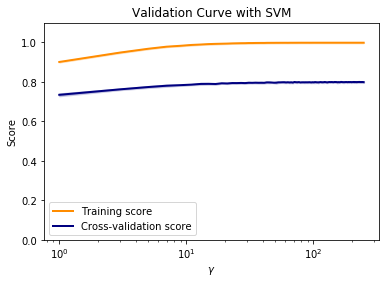

In [255]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

X, y = features, target

param_range = np.arange(1, 250, 2)
train_scores, test_scores = validation_curve(RandomForestClassifier(), 
                                             X, 
                                             y, 
                                             param_name="n_estimators", 
                                             param_range=param_range,
                                             cv=3, 
                                             scoring="accuracy", 
                                             n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [ ]:
test_id = pd.DataFrame
test_id=test_copy['id']

In [95]:

def model_for_submission(features, target, test):
    if __name__ == '__main__':

        rf = RandomForestClassifier(criterion='entropy',
                                n_estimators=200,
                                max_features='auto',
                                min_samples_split='40',
                                oob_score=True,
                                bootstrap=True,
                                random_state=60,
                                n_jobs=-1)

        
        param_grid = {"min_samples_split" : [8],
             "n_estimators" : [400]}

        estimator = GridSearchCV(estimator=rf,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=5,
                  n_jobs=-1)

        estimator.fit(features, target)        

        predictions = estimator.predict(test)

        data = {'ID': test_id, 'status_group': predictions}

        submit = pd.DataFrame(data=data)

        vals_to_replace = {2:'functional', 1:'functional needs repair',
                           0:'non functional'}

        submit.status_group = submit.status_group.replace(vals_to_replace)        

        submit.to_csv('Submission_file8.35.csv', index=False)


In [96]:
model_for_submission(features, target, test)

#### REFERENCE :
##### https://github.com/pancr9/Pump-It-Up/blob/master/Pump%20It%20Up%20-%20Data%20Cleaning.ipynb
##### https://www.kaggle.com/arthurtok/feature-ranking-rfe-random-forest-linear-models